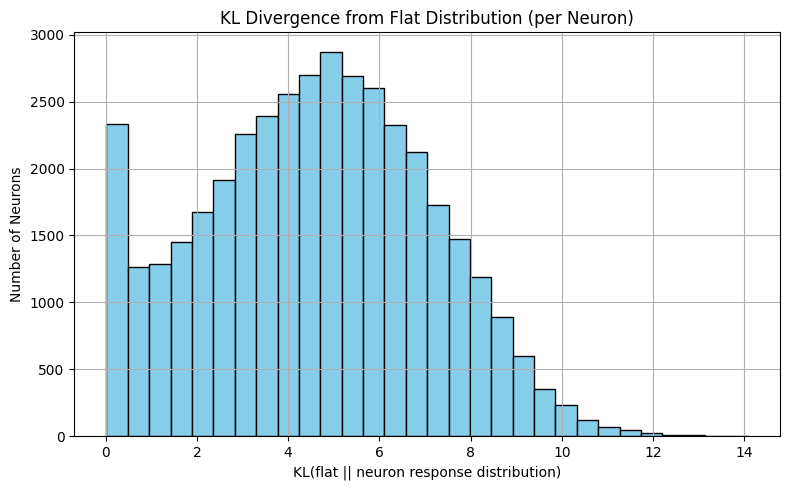

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the neural response data
dat = np.load('/home/maria/LuckyMouse2/pixel_transformer_neuro/data/processed/hybrid_neural_responses_reduced.npy')

# Each entry is the number of events out of 50 trials → convert to probability
prob_matrix = dat / 50.0  # shape: (num_neurons, num_images)

# To avoid log(0), add a small constant epsilon
epsilon = 1e-10
prob_matrix_safe = prob_matrix + epsilon

# Number of images (stimuli)
num_images = prob_matrix.shape[1]

# Define the flat (uniform) distribution over images
flat_dist = np.full((num_images,), 1.0 / num_images)

# Compute KL(flat || neuron_dist) for each neuron
kl_divergences = []
for i in range(prob_matrix_safe.shape[0]):
    neuron_probs = prob_matrix_safe[i]
    neuron_dist = neuron_probs / np.sum(neuron_probs)  # normalize to sum to 1
    kl = np.sum(flat_dist * np.log(flat_dist / neuron_dist))
    kl_divergences.append(kl)

kl_divergences = np.array(kl_divergences)

# Plot the histogram of KL divergences
plt.figure(figsize=(8, 5))
plt.hist(kl_divergences, bins=30, color='skyblue', edgecolor='black')
plt.title("KL Divergence from Flat Distribution (per Neuron)")
plt.xlabel("KL(flat || neuron response distribution)")
plt.ylabel("Number of Neurons")
plt.grid(True)
plt.tight_layout()
plt.show()


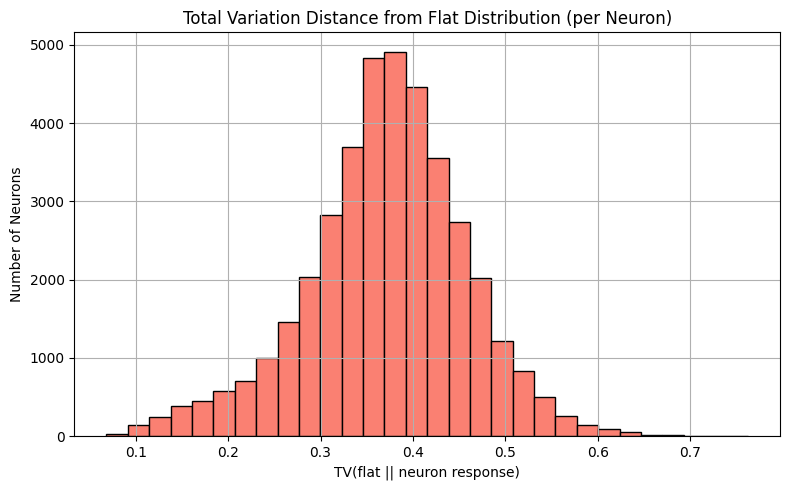

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load your neural response data
dat = np.load('/home/maria/LuckyMouse2/pixel_transformer_neuro/data/processed/hybrid_neural_responses_reduced.npy')

# Convert event counts (out of 50) to probability estimates
prob_matrix = dat / 50.0
epsilon = 1e-10
prob_matrix_safe = prob_matrix + epsilon

num_neurons, num_images = prob_matrix_safe.shape

# Flat (uniform) distribution over images
uniform_dist = np.full((num_images,), 1.0 / num_images)

# Compute total variation distance for each neuron
tv_distances = []
for neuron_probs in prob_matrix_safe:
    neuron_dist = neuron_probs / np.sum(neuron_probs)
    tv = 0.5 * np.sum(np.abs(neuron_dist - uniform_dist))
    tv_distances.append(tv)

tv_distances = np.array(tv_distances)

# Plot histogram of TV distances
plt.figure(figsize=(8, 5))
plt.hist(tv_distances, bins=30, color='salmon', edgecolor='black')
plt.title("Total Variation Distance from Flat Distribution (per Neuron)")
plt.xlabel("TV(flat || neuron response)")
plt.ylabel("Number of Neurons")
plt.grid(True)
plt.tight_layout()
plt.show()
